In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
data1 = pd.read_excel("simple-linear-regression.xlsx")

In [3]:
data1.head()

,Number of Employees,Average Number of Tickets
0,51,1
1,68,9
2,67,20
3,124,1
4,124,8


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
Number of Employees          20 non-null int64
Average Number of Tickets    20 non-null int64
dtypes: int64(2)
memory usage: 400.0 bytes


In [31]:
X = data1["Number of Employees"]
y = data1["Average Number of Tickets"]

## regression + scatter plot using seaborn

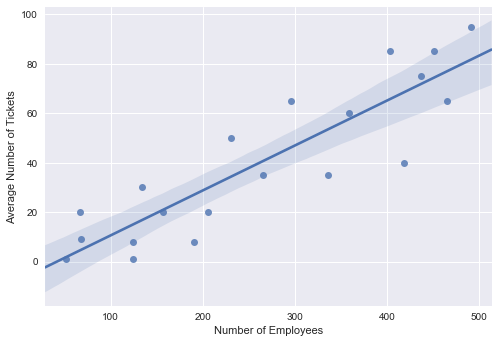

In [48]:
sns.regplot(X,y)

## linear regression by sklearn

In [43]:
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y)
model.coef_, model.intercept_

(array([ 0.18173583]), -7.5464782252213496)

In [45]:
model.score(X.values.reshape(-1,1),y)

0.78620714716141282

## p value by statsmodels.api

In [42]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                               
Dep. Variable:     Average Number of Tickets   R-squared:                       0.786
Model:                                   OLS   Adj. R-squared:                  0.774
Method:                        Least Squares   F-statistic:                     66.19
Date:                       Sat, 29 Apr 2017   Prob (F-statistic):           1.93e-07
Time:                               18:19:34   Log-Likelihood:                -80.664
No. Observations:                         20   AIC:                             165.3
Df Residuals:                             18   BIC:                             167.3
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

# Multiple value linear regression

In [49]:
data2 = pd.read_excel("linear-example-data.xlsx")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
Client ID                    300 non-null object
Average Number of Tickets    300 non-null int64
Number of Employees          300 non-null int64
Value of Contract            300 non-null int64
Industry                     300 non-null object
dtypes: int64(3), object(2)
memory usage: 11.8+ KB


In [53]:
dummies = pd.get_dummies(data2["Industry"])
data3 = pd.concat([data2, dummies], axis=1)
data3.head()

,Client ID,Average Number of Tickets,Number of Employees,Value of Contract,Industry,Manufacturing,Retail,Services
0,TK669,90,561,200000,Retail,0,1,0
1,EY859,85,530,200000,Retail,0,1,0
2,TN571,5,82,25000,Manufacturing,1,0,0
3,LJ675,82,491,225000,Manufacturing,1,0,0
4,KH713,12,230,75000,Services,0,0,1


In [54]:
y = data2["Average Number of Tickets"]
X = data3.drop(["Average Number of Tickets","Client ID","Industry"],axis=1)

In [56]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                               
Dep. Variable:     Average Number of Tickets   R-squared:                       0.585
Model:                                   OLS   Adj. R-squared:                  0.579
Method:                        Least Squares   F-statistic:                     104.0
Date:                       Sat, 29 Apr 2017   Prob (F-statistic):           3.99e-55
Time:                               18:36:59   Log-Likelihood:                -1418.7
No. Observations:                        300   AIC:                             2847.
Df Residuals:                            295   BIC:                             2866.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------